### Github ID: Boximao
### Name: Che-Wei Yeh
### USCID: 7415538737

### 1

In [1]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb

### a

In [5]:
column_name=['Temp','Nausea','LP','UP','MP','Burn','d1','d2']
data = pd.read_csv("..\\data\\diagnosis.data",encoding="utf_16",sep='\t', decimal=',',header=None)
data

0    1    2    3    4    5    6    7
0    35.5   no  yes   no   no   no   no   no
1    35.9   no   no  yes  yes  yes  yes   no
2    35.9   no  yes   no   no   no   no   no
3    36.0   no   no  yes  yes  yes  yes   no
4    36.0   no  yes   no   no   no   no   no
..    ...  ...  ...  ...  ...  ...  ...  ...
115  41.4   no  yes  yes   no  yes   no  yes
116  41.5   no   no   no   no   no   no   no
117  41.5  yes  yes   no  yes   no   no  yes
118  41.5   no  yes  yes   no  yes   no  yes
119  41.5   no  yes  yes   no  yes   no  yes

[120 rows x 8 columns]

In [6]:
df_1=data.copy()
df_1.columns=column_name

In [7]:
df_1

Temp Nausea   LP   UP   MP Burn   d1   d2
0    35.5     no  yes   no   no   no   no   no
1    35.9     no   no  yes  yes  yes  yes   no
2    35.9     no  yes   no   no   no   no   no
3    36.0     no   no  yes  yes  yes  yes   no
4    36.0     no  yes   no   no   no   no   no
..    ...    ...  ...  ...  ...  ...  ...  ...
115  41.4     no  yes  yes   no  yes   no  yes
116  41.5     no   no   no   no   no   no   no
117  41.5    yes  yes   no  yes   no   no  yes
118  41.5     no  yes  yes   no  yes   no  yes
119  41.5     no  yes  yes   no  yes   no  yes

[120 rows x 8 columns]

### b

In [8]:
X=df_1.iloc[:,0:6]
y_1=df_1.iloc[:,6]
y_2=df_1.iloc[:,7]

In [9]:
le_Temp=LabelEncoder()
le_Nausea=LabelEncoder()
le_LP=LabelEncoder()
le_UP=LabelEncoder()
le_MP=LabelEncoder()
le_Burn=LabelEncoder()
le_d1=LabelEncoder()
le_d2=LabelEncoder()

In [10]:
X['Temp_n']=le_Temp.fit_transform(X['Temp'])
X['Nausea_n']=le_Temp.fit_transform(X['Nausea'])
X['LP_n']=le_Temp.fit_transform(X['LP'])
X['UP_n']=le_Temp.fit_transform(X['UP'])
X['MP_n']=le_Temp.fit_transform(X['MP'])
X['Burn_n']=le_Temp.fit_transform(X['Burn'])
#y_1=le_d1.fit_transform(y_1)
#y_2=le_d2.fit_transform(y_2)

In [11]:
X=X.drop(['Temp','Nausea','LP','UP','MP','Burn'],axis='columns')
X

Temp_n  Nausea_n  LP_n  UP_n  MP_n  Burn_n
0         0         0     1     0     0       0
1         1         0     0     1     1       1
2         1         0     1     0     0       0
3         2         0     0     1     1       1
4         2         0     1     0     0       0
..      ...       ...   ...   ...   ...     ...
115      42         0     1     1     0       1
116      43         0     0     0     0       0
117      43         1     1     0     1       0
118      43         0     1     1     0       1
119      43         0     1     1     0       1

[120 rows x 6 columns]

In [12]:
model=tree.DecisionTreeClassifier()

In [13]:
# X_train,X_test,y_1_train,y_1_test=train_test_split(X,y_1,test_size=0.3,random_state=71)

In [14]:
model.fit(X,y_1)

DecisionTreeClassifier()

In [15]:
model.score(X,y_1)

1.0

In [16]:
feature_names = X.columns
target_names = df_1['d1'].unique().tolist()

[Text(0.4, 0.875, 'UP_n <= 0.5\ngini = 0.5\nsamples = 120\nvalue = [61, 59]\nclass = no'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0]\nclass = no'),
 Text(0.6, 0.625, 'MP_n <= 0.5\ngini = 0.387\nsamples = 80\nvalue = [21, 59]\nclass = yes'),
 Text(0.4, 0.375, 'LP_n <= 0.5\ngini = 0.437\nsamples = 31\nvalue = [21, 10]\nclass = no'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]\nclass = yes'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]\nclass = no'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 49\nvalue = [0, 49]\nclass = yes')]

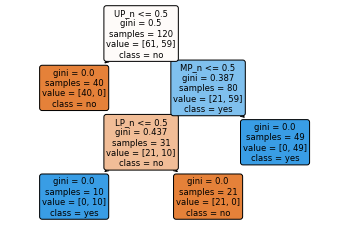

In [17]:
# Draw graph for d1
plot_tree(model, feature_names=feature_names,class_names=target_names,filled=True,rounded=True)




In [18]:
model.fit(X,y_2)

DecisionTreeClassifier()

In [19]:
model.score(X,y_2)

1.0

In [20]:
feature_names = X.columns
target_names = df_1['d2'].unique().tolist()

[Text(0.4, 0.8333333333333334, 'Temp_n <= 18.5\ngini = 0.486\nsamples = 120\nvalue = [70, 50]\nclass = no'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 60\nvalue = [60, 0]\nclass = no'),
 Text(0.6, 0.5, 'LP_n <= 0.5\ngini = 0.278\nsamples = 60\nvalue = [10, 50]\nclass = yes'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]\nclass = no'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 50\nvalue = [0, 50]\nclass = yes')]

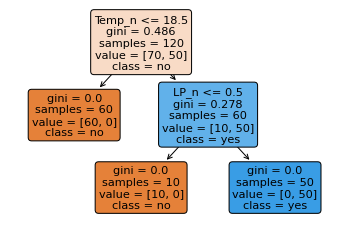

In [21]:
# Draw graph for d2
plot_tree(model, feature_names=feature_names,class_names=target_names,filled=True,rounded=True)


### c

In [23]:
# build decision tree for d1
d1=[]


In [24]:
def d1_decision(df):
    for index, rows in df.iterrows():
        if rows[3]<=0.5:
            d1.append('no')
        elif rows[3]>0.5:
            if rows[4]>0.5:
                d1.append('yes')
            elif rows[4]<=0.5:
                if rows[2]<=0.5:
                    d1.append('yes')
                else:
                    d1.append('no')

In [25]:
d1_decision(X)

In [26]:
print(f'accuracy = {len(d1)/sum(d1==y_1)}')

accuracy = 1.0


In [27]:
# build decision tree for d2
d2=[]

In [28]:
def d2_decision(df):
    for index, rows in df.iterrows():
        if rows[0]<=18.5:
            d2.append('no')
        elif rows[0]>18.5:
            if rows[2]<=0.5:
                d2.append('no')
            else:
                d2.append('yes')

In [29]:
d2_decision(X)

In [30]:
print(f'accuracy = {len(d2)/sum(d2==y_2)}')

accuracy = 1.0


### d

In [31]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X, y_1)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [32]:
ccp_alphas

array([0.        , 0.11290323, 0.14522177, 0.24173611])

Text(0, 0.5, 'total impurity of leaves')

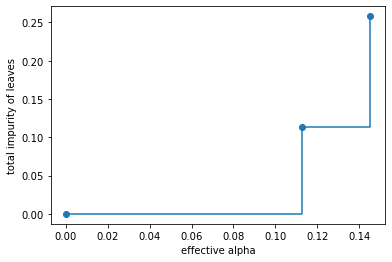

In [33]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")

In [34]:
accuracy=[]
for i in ccp_alphas:
    model=DecisionTreeClassifier(ccp_alpha=i)
    
    model.fit(X,y_1)
    y_pred=model.predict(X)
    
    accuracy.append(accuracy_score(y_pred,y_1))
    
        

In [35]:
accuracy

[1.0, 0.9166666666666666, 0.825, 0.5083333333333333]

<AxesSubplot:>

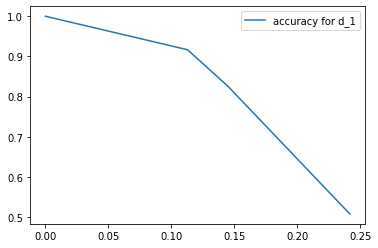

In [36]:
sns.lineplot(x=ccp_alphas,y=accuracy,label='accuracy for d_1')

In [37]:
# select best alpha with pruning for d1
model=tree.DecisionTreeClassifier(ccp_alpha=0.113)
model.fit(X,y_1)

DecisionTreeClassifier(ccp_alpha=0.113)

In [38]:
model.score(X,y_1)

0.9166666666666666

[Text(0.4, 0.8333333333333334, 'UP_n <= 0.5\ngini = 0.5\nsamples = 120\nvalue = [61, 59]\nclass = no'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0]\nclass = no'),
 Text(0.6, 0.5, 'MP_n <= 0.5\ngini = 0.387\nsamples = 80\nvalue = [21, 59]\nclass = yes'),
 Text(0.4, 0.16666666666666666, 'gini = 0.437\nsamples = 31\nvalue = [21, 10]\nclass = no'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 49\nvalue = [0, 49]\nclass = yes')]

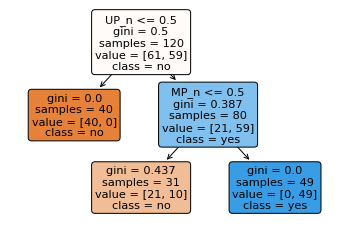

In [39]:
feature_names = X.columns
target_names = df_1['d1'].unique().tolist()
plot_tree(model, feature_names=feature_names,class_names=target_names,filled=True,rounded=True)


In [40]:

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X, y_2)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [41]:
ccp_alphas

array([0.        , 0.13888889, 0.34722222])

Text(0, 0.5, 'total impurity of leaves')

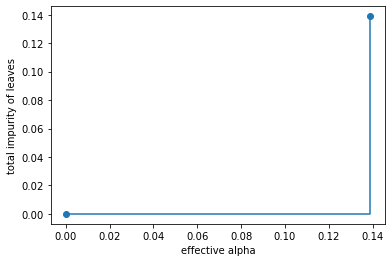

In [42]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")

In [43]:
accuracy=[]
for i in ccp_alphas:
    model=DecisionTreeClassifier(ccp_alpha=i)
    
    model.fit(X,y_2)
    y_pred=model.predict(X)
    
    accuracy.append(accuracy_score(y_pred,y_2))
    
        

<AxesSubplot:>

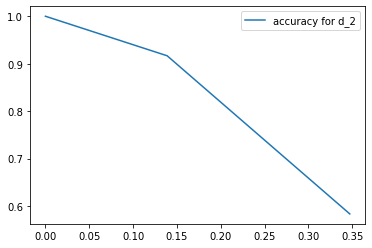

In [44]:
sns.lineplot(x=ccp_alphas,y=accuracy,label='accuracy for d_2')

In [45]:
# select best alpha with pruning for d2
model=tree.DecisionTreeClassifier(ccp_alpha=0.139)
model.fit(X,y_2)

DecisionTreeClassifier(ccp_alpha=0.139)

In [46]:
model.score(X,y_2)

0.9166666666666666

[Text(0.5, 0.75, 'Temp_n <= 18.5\ngini = 0.486\nsamples = 120\nvalue = [70, 50]\nclass = no'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 60\nvalue = [60, 0]\nclass = no'),
 Text(0.75, 0.25, 'gini = 0.278\nsamples = 60\nvalue = [10, 50]\nclass = yes')]

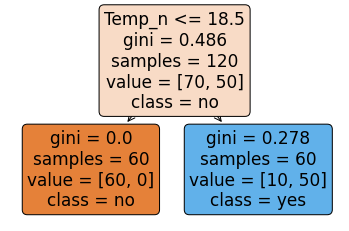

In [47]:
feature_names = X.columns
target_names = df_1['d2'].unique().tolist()
plot_tree(model, feature_names=feature_names,class_names=target_names,filled=True,rounded=True)


### 2

### a

In [48]:
data = pd.read_csv("..\\data\\communities.data",header=None,na_values='?')
data

0     1        2                    3    4     5     6     7     8    \
0       8   NaN      NaN         Lakewoodcity    1  0.19  0.33  0.02  0.90   
1      53   NaN      NaN          Tukwilacity    1  0.00  0.16  0.12  0.74   
2      24   NaN      NaN         Aberdeentown    1  0.00  0.42  0.49  0.56   
3      34   5.0  81440.0  Willingborotownship    1  0.04  0.77  1.00  0.08   
4      42  95.0   6096.0    Bethlehemtownship    1  0.01  0.55  0.02  0.95   
...   ...   ...      ...                  ...  ...   ...   ...   ...   ...   
1989   12   NaN      NaN    TempleTerracecity   10  0.01  0.40  0.10  0.87   
1990    6   NaN      NaN          Seasidecity   10  0.05  0.96  0.46  0.28   
1991    9   9.0  80070.0        Waterburytown   10  0.16  0.37  0.25  0.69   
1992   25  17.0  72600.0          Walthamcity   10  0.08  0.51  0.06  0.87   
1993    6   NaN      NaN          Ontariocity   10  0.20  0.78  0.14  0.46   

       9    ...   118   119   120   121   122   123  124   125   126   127  
0     0.12  ...  0.12  0.26  0.20  0.06  0.04  0.90  0.5  0.32  0.14  0.20  
1     0.45  ...  0.02  0.12  0.45   NaN   NaN   NaN  NaN  0.00   NaN  0.67  
2     0.17  ...  0.01  0.21  0.02   NaN   NaN   NaN  NaN  0.00   NaN  0.43  
3     0.12  ...  0.02  0.39  0.28   NaN   NaN   NaN  NaN  0.00   NaN  0.12  
4     0.09  ...  0.04  0.09  0.02   NaN   NaN   NaN  NaN  0.00   NaN  0.03  
...    ...  ...   ...   ...   ...   ...   ...   ...  ...   ...   ...   ...  
1989  0.12  ...  0.01  0.28  0.05   NaN   NaN   NaN  NaN  0.00   NaN  0.09  
1990  0.83  ...  0.02  0.37  0.20   NaN   NaN   NaN  NaN  0.00   NaN  0.45  
1991  0.04  ...  0.08  0.32  0.18  0.08  0.06  0.78  0.0  0.91  0.28  0.23  
1992  0.22  ...  0.03  0.38  0.33  0.02  0.02  0.79  0.0  0.22  0.18  0.19  
1993  0.24  ...  0.11  0.30  0.05  0.08  0.04  0.73  0.5  1.00  0.13  0.48  

[1994 rows x 128 columns]

In [49]:
df_2=data.copy()

In [50]:
df_train=df_2.iloc[:1495]
df_test=df_2.iloc[1495:]

In [51]:
df_train

0     1        2                    3    4     5     6     7     8    \
0       8   NaN      NaN         Lakewoodcity    1  0.19  0.33  0.02  0.90   
1      53   NaN      NaN          Tukwilacity    1  0.00  0.16  0.12  0.74   
2      24   NaN      NaN         Aberdeentown    1  0.00  0.42  0.49  0.56   
3      34   5.0  81440.0  Willingborotownship    1  0.04  0.77  1.00  0.08   
4      42  95.0   6096.0    Bethlehemtownship    1  0.01  0.55  0.02  0.95   
...   ...   ...      ...                  ...  ...   ...   ...   ...   ...   
1490    6   NaN      NaN     Hillsboroughtown    8  0.00  0.59  0.01  0.69   
1491    6   NaN      NaN           Orangecity    8  0.16  0.62  0.03  0.74   
1492   13   NaN      NaN         Waycrosscity    8  0.01  0.36  0.95  0.24   
1493   39  85.0  49056.0           Mentorcity    8  0.06  0.53  0.01  0.98   
1494   34  17.0  79610.0      WestNewYorktown    8  0.05  0.43  0.08  0.65   

       9    ...   118   119   120   121   122   123  124   125   126   127  
0     0.12  ...  0.12  0.26  0.20  0.06  0.04  0.90  0.5  0.32  0.14  0.20  
1     0.45  ...  0.02  0.12  0.45   NaN   NaN   NaN  NaN  0.00   NaN  0.67  
2     0.17  ...  0.01  0.21  0.02   NaN   NaN   NaN  NaN  0.00   NaN  0.43  
3     0.12  ...  0.02  0.39  0.28   NaN   NaN   NaN  NaN  0.00   NaN  0.12  
4     0.09  ...  0.04  0.09  0.02   NaN   NaN   NaN  NaN  0.00   NaN  0.03  
...    ...  ...   ...   ...   ...   ...   ...   ...  ...   ...   ...   ...  
1490  1.00  ...  0.02  0.14  0.22   NaN   NaN   NaN  NaN  0.00   NaN  0.03  
1491  0.48  ...  0.07  0.40  0.14  0.07  0.05  0.85  0.5  0.61  0.19  0.20  
1492  0.03  ...  0.03  0.12  0.01   NaN   NaN   NaN  NaN  0.00   NaN  0.30  
1493  0.05  ...  0.08  0.15  0.02   NaN   NaN   NaN  NaN  0.00   NaN  0.03  
1494  0.12  ...  0.00  1.00  1.00  0.00  0.01  0.77  0.0  0.51  0.18  0.23  

[1495 rows x 128 columns]

### b

In [52]:
df_train=df_train.iloc[:,5:]

In [53]:
df_train

5     6     7     8     9     10    11    12    13    14   ...   118  \
0     0.19  0.33  0.02  0.90  0.12  0.17  0.34  0.47  0.29  0.32  ...  0.12   
1     0.00  0.16  0.12  0.74  0.45  0.07  0.26  0.59  0.35  0.27  ...  0.02   
2     0.00  0.42  0.49  0.56  0.17  0.04  0.39  0.47  0.28  0.32  ...  0.01   
3     0.04  0.77  1.00  0.08  0.12  0.10  0.51  0.50  0.34  0.21  ...  0.02   
4     0.01  0.55  0.02  0.95  0.09  0.05  0.38  0.38  0.23  0.36  ...  0.04   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1490  0.00  0.59  0.01  0.69  1.00  0.07  0.41  0.28  0.23  0.57  ...  0.02   
1491  0.16  0.62  0.03  0.74  0.48  0.42  0.44  0.57  0.40  0.25  ...  0.07   
1492  0.01  0.36  0.95  0.24  0.03  0.01  0.44  0.42  0.27  0.63  ...  0.03   
1493  0.06  0.53  0.01  0.98  0.05  0.01  0.40  0.40  0.24  0.29  ...  0.08   
1494  0.05  0.43  0.08  0.65  0.12  1.00  0.37  0.52  0.33  0.44  ...  0.00   

       119   120   121   122   123  124   125   126   127  
0     0.26  0.20  0.06  0.04  0.90  0.5  0.32  0.14  0.20  
1     0.12  0.45   NaN   NaN   NaN  NaN  0.00   NaN  0.67  
2     0.21  0.02   NaN   NaN   NaN  NaN  0.00   NaN  0.43  
3     0.39  0.28   NaN   NaN   NaN  NaN  0.00   NaN  0.12  
4     0.09  0.02   NaN   NaN   NaN  NaN  0.00   NaN  0.03  
...    ...   ...   ...   ...   ...  ...   ...   ...   ...  
1490  0.14  0.22   NaN   NaN   NaN  NaN  0.00   NaN  0.03  
1491  0.40  0.14  0.07  0.05  0.85  0.5  0.61  0.19  0.20  
1492  0.12  0.01   NaN   NaN   NaN  NaN  0.00   NaN  0.30  
1493  0.15  0.02   NaN   NaN   NaN  NaN  0.00   NaN  0.03  
1494  1.00  1.00  0.00  0.01  0.77  0.0  0.51  0.18  0.23  

[1495 rows x 123 columns]

In [54]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [55]:
df_train=imp.fit_transform(df_train)
df_train=pd.DataFrame(df_train)
df_train

0     1     2     3     4     5     6     7     8     9    ...   113  \
0     0.19  0.33  0.02  0.90  0.12  0.17  0.34  0.47  0.29  0.32  ...  0.12   
1     0.00  0.16  0.12  0.74  0.45  0.07  0.26  0.59  0.35  0.27  ...  0.02   
2     0.00  0.42  0.49  0.56  0.17  0.04  0.39  0.47  0.28  0.32  ...  0.01   
3     0.04  0.77  1.00  0.08  0.12  0.10  0.51  0.50  0.34  0.21  ...  0.02   
4     0.01  0.55  0.02  0.95  0.09  0.05  0.38  0.38  0.23  0.36  ...  0.04   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1490  0.00  0.59  0.01  0.69  1.00  0.07  0.41  0.28  0.23  0.57  ...  0.02   
1491  0.16  0.62  0.03  0.74  0.48  0.42  0.44  0.57  0.40  0.25  ...  0.07   
1492  0.01  0.36  0.95  0.24  0.03  0.01  0.44  0.42  0.27  0.63  ...  0.03   
1493  0.06  0.53  0.01  0.98  0.05  0.01  0.40  0.40  0.24  0.29  ...  0.08   
1494  0.05  0.43  0.08  0.65  0.12  1.00  0.37  0.52  0.33  0.44  ...  0.00   

       114   115       116       117       118       119   120       121   122  
0     0.26  0.20  0.060000  0.040000  0.900000  0.500000  0.32  0.140000  0.20  
1     0.12  0.45  0.163975  0.080502  0.713054  0.451883  0.00  0.190753  0.67  
2     0.21  0.02  0.163975  0.080502  0.713054  0.451883  0.00  0.190753  0.43  
3     0.39  0.28  0.163975  0.080502  0.713054  0.451883  0.00  0.190753  0.12  
4     0.09  0.02  0.163975  0.080502  0.713054  0.451883  0.00  0.190753  0.03  
...    ...   ...       ...       ...       ...       ...   ...       ...   ...  
1490  0.14  0.22  0.163975  0.080502  0.713054  0.451883  0.00  0.190753  0.03  
1491  0.40  0.14  0.070000  0.050000  0.850000  0.500000  0.61  0.190000  0.20  
1492  0.12  0.01  0.163975  0.080502  0.713054  0.451883  0.00  0.190753  0.30  
1493  0.15  0.02  0.163975  0.080502  0.713054  0.451883  0.00  0.190753  0.03  
1494  1.00  1.00  0.000000  0.010000  0.770000  0.000000  0.51  0.180000  0.23  

[1495 rows x 123 columns]

### c

In [56]:
df_train.corr()

0         1         2         3         4         5         6    \
0    1.000000 -0.040404  0.242144 -0.306023  0.168868  0.162282  0.014554   
1   -0.040404  1.000000 -0.068374 -0.243565  0.209848  0.473320  0.517742   
2    0.242144 -0.068374  1.000000 -0.793431 -0.104912 -0.069449  0.118272   
3   -0.306023 -0.243565 -0.793431  1.000000 -0.270829 -0.436737 -0.189135   
4    0.168868  0.209848 -0.104912 -0.270829  1.000000  0.264600 -0.017945   
..        ...       ...       ...       ...       ...       ...       ...   
118 -0.063029 -0.024445 -0.113466  0.077626  0.031598  0.018398 -0.025210   
119  0.041216  0.008771  0.022226 -0.048890  0.050863  0.048441  0.035629   
120  0.464459 -0.086315  0.257781 -0.272366  0.100653  0.126210  0.012529   
121 -0.011305 -0.021276  0.042346 -0.029339 -0.004045  0.025112 -0.050001   
122  0.364245 -0.031156  0.644094 -0.690614  0.034705  0.288889  0.059148   

          7         8         9    ...       113       114       115  \
0    0.128721  0.075744 -0.107060  ...  0.747424  0.235510  0.283682   
1    0.371658  0.301949 -0.606714  ... -0.020832 -0.003807 -0.030652   
2    0.143406  0.125330  0.056381  ...  0.155017  0.101270  0.169002   
3   -0.258390 -0.175195  0.138619  ... -0.147054 -0.339787 -0.234460   
4    0.106958  0.056442 -0.283709  ...  0.004790  0.360708  0.274826   
..        ...       ...       ...  ...       ...       ...       ...   
118 -0.008902 -0.006311  0.021422  ... -0.067853  0.068739  0.028476   
119  0.016274  0.015603 -0.034216  ...  0.070956 -0.071059 -0.084771   
120  0.117998  0.083582 -0.022575  ...  0.322885  0.236545  0.209710   
121 -0.038149 -0.033481  0.042617  ... -0.105834  0.095796  0.105645   
122  0.141317  0.087308  0.063244  ...  0.205028  0.296475  0.159291   

          116       117       118       119       120       121       122  
0    0.630778  0.591778 -0.063029  0.041216  0.464459 -0.011305  0.364245  
1   -0.014900  0.004813 -0.024445  0.008771 -0.086315 -0.021276 -0.031156  
2    0.142543  0.104193 -0.113466  0.022226  0.257781  0.042346  0.644094  
3   -0.131432 -0.126551  0.077626 -0.048890 -0.272366 -0.029339 -0.690614  
4   -0.023657  0.044584  0.031598  0.050863  0.100653 -0.004045  0.034705  
..        ...       ...       ...       ...       ...       ...       ...  
118 -0.118489 -0.070216  1.000000 -0.033617  0.032430 -0.187790 -0.048109  
119  0.008831 -0.013583 -0.033617  1.000000 -0.017356 -0.040769  0.075703  
120 -0.058210 -0.068059  0.032430 -0.017356  1.000000  0.017402  0.331882  
121  0.275048  0.297196 -0.187790 -0.040769  0.017402  1.000000  0.078912  
122  0.194863  0.172560 -0.048109  0.075703  0.331882  0.078912  1.000000  

[123 rows x 123 columns]

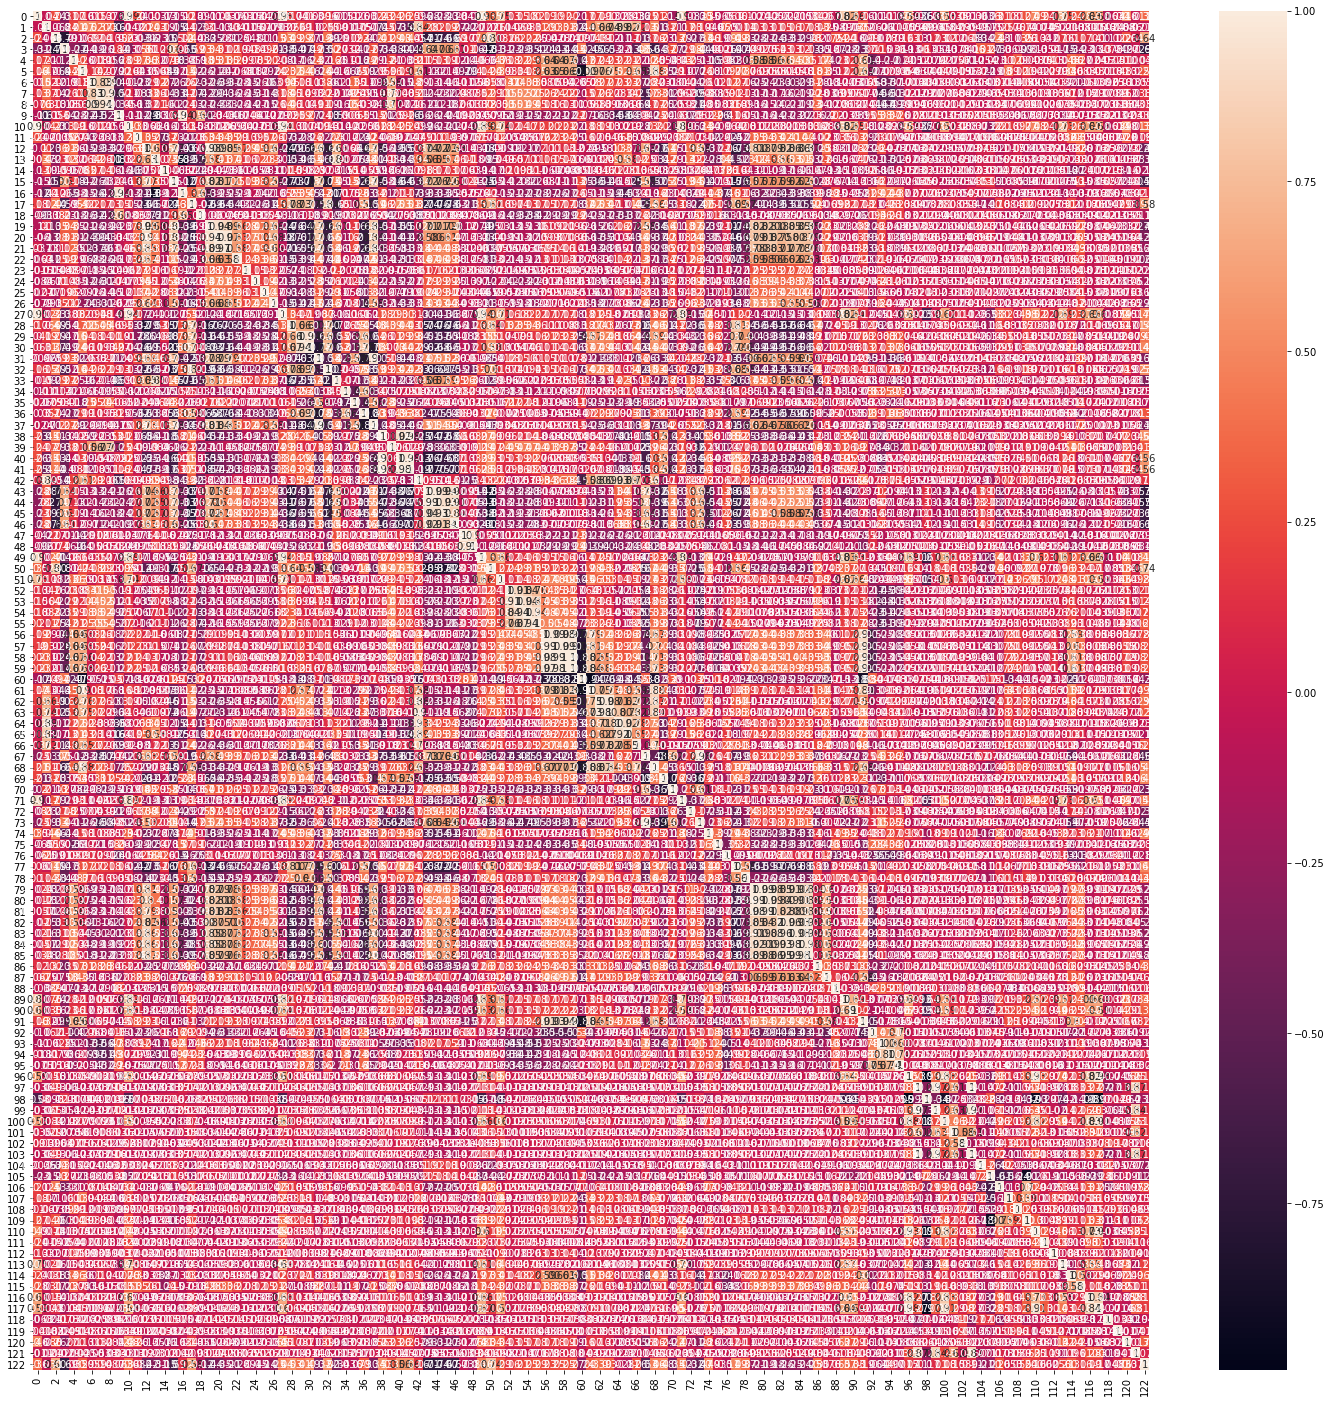

In [57]:
# show correlation matrix in heatmap form
cor_mat=df_train.corr()
plt.figure(figsize = (25,25))
sns.heatmap(cor_mat,annot=True)

plt.show()

### d

In [58]:
df_train

0     1     2     3     4     5     6     7     8     9    ...   113  \
0     0.19  0.33  0.02  0.90  0.12  0.17  0.34  0.47  0.29  0.32  ...  0.12   
1     0.00  0.16  0.12  0.74  0.45  0.07  0.26  0.59  0.35  0.27  ...  0.02   
2     0.00  0.42  0.49  0.56  0.17  0.04  0.39  0.47  0.28  0.32  ...  0.01   
3     0.04  0.77  1.00  0.08  0.12  0.10  0.51  0.50  0.34  0.21  ...  0.02   
4     0.01  0.55  0.02  0.95  0.09  0.05  0.38  0.38  0.23  0.36  ...  0.04   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1490  0.00  0.59  0.01  0.69  1.00  0.07  0.41  0.28  0.23  0.57  ...  0.02   
1491  0.16  0.62  0.03  0.74  0.48  0.42  0.44  0.57  0.40  0.25  ...  0.07   
1492  0.01  0.36  0.95  0.24  0.03  0.01  0.44  0.42  0.27  0.63  ...  0.03   
1493  0.06  0.53  0.01  0.98  0.05  0.01  0.40  0.40  0.24  0.29  ...  0.08   
1494  0.05  0.43  0.08  0.65  0.12  1.00  0.37  0.52  0.33  0.44  ...  0.00   

       114   115       116       117       118       119   120       121   122  
0     0.26  0.20  0.060000  0.040000  0.900000  0.500000  0.32  0.140000  0.20  
1     0.12  0.45  0.163975  0.080502  0.713054  0.451883  0.00  0.190753  0.67  
2     0.21  0.02  0.163975  0.080502  0.713054  0.451883  0.00  0.190753  0.43  
3     0.39  0.28  0.163975  0.080502  0.713054  0.451883  0.00  0.190753  0.12  
4     0.09  0.02  0.163975  0.080502  0.713054  0.451883  0.00  0.190753  0.03  
...    ...   ...       ...       ...       ...       ...   ...       ...   ...  
1490  0.14  0.22  0.163975  0.080502  0.713054  0.451883  0.00  0.190753  0.03  
1491  0.40  0.14  0.070000  0.050000  0.850000  0.500000  0.61  0.190000  0.20  
1492  0.12  0.01  0.163975  0.080502  0.713054  0.451883  0.00  0.190753  0.30  
1493  0.15  0.02  0.163975  0.080502  0.713054  0.451883  0.00  0.190753  0.03  
1494  1.00  1.00  0.000000  0.010000  0.770000  0.000000  0.51  0.180000  0.23  

[1495 rows x 123 columns]

In [59]:
CV=[]
for columnName, columnData in df_train.iteritems():
    CV.append(np.std(columnData)/np.mean(columnData))
    
CV=pd.DataFrame(CV)
CV.columns=['CV']
CV

CV
0    2.240355
1    0.355681
2    1.428407
3    0.330102
4    1.358645
..        ...
118  0.115700
119  0.362868
120  2.552092
121  0.325917
122  0.987578

[123 rows x 1 columns]

### e

In [60]:
CV_largest=CV.nlargest(11,'CV')
CV_largest

CV
90   4.291487
89   3.469791
49   3.057941
51   2.925656
120  2.552092
27   2.341660
0    2.240355
10   2.037780
71   1.967809
113  1.644857
5    1.611552

In [61]:
sel=CV_largest.index
sel

Int64Index([90, 89, 49, 51, 120, 27, 0, 10, 71, 113, 5], dtype='int64')

In [62]:
df_sel=df_train[sel]
df_sel

90    89    49    51    120   27    0     10    71    113   5  
0     0.00  0.04  0.04  0.03  0.32  0.08  0.19  0.20  0.21  0.12  0.17
1     0.00  0.00  0.00  0.01  0.00  0.01  0.00  0.02  0.02  0.02  0.07
2     0.00  0.00  0.01  0.00  0.00  0.01  0.00  0.00  0.01  0.01  0.04
3     0.00  0.00  0.03  0.02  0.00  0.01  0.04  0.06  0.01  0.02  0.10
4     0.00  0.00  0.00  0.00  0.00  0.00  0.01  0.02  0.01  0.04  0.05
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
1490  0.00  0.00  0.00  0.01  0.00  0.00  0.00  0.02  0.01  0.02  0.07
1491  0.03  0.09  0.04  0.15  0.61  0.08  0.16  0.18  0.06  0.07  0.42
1492  0.00  0.00  0.03  0.00  0.00  0.04  0.01  0.00  0.05  0.03  0.01
1493  0.00  0.00  0.00  0.01  0.00  0.01  0.06  0.07  0.02  0.08  0.01
1494  0.00  0.00  0.04  0.15  0.51  0.06  0.05  0.06  0.07  0.00  1.00

[1495 rows x 11 columns]

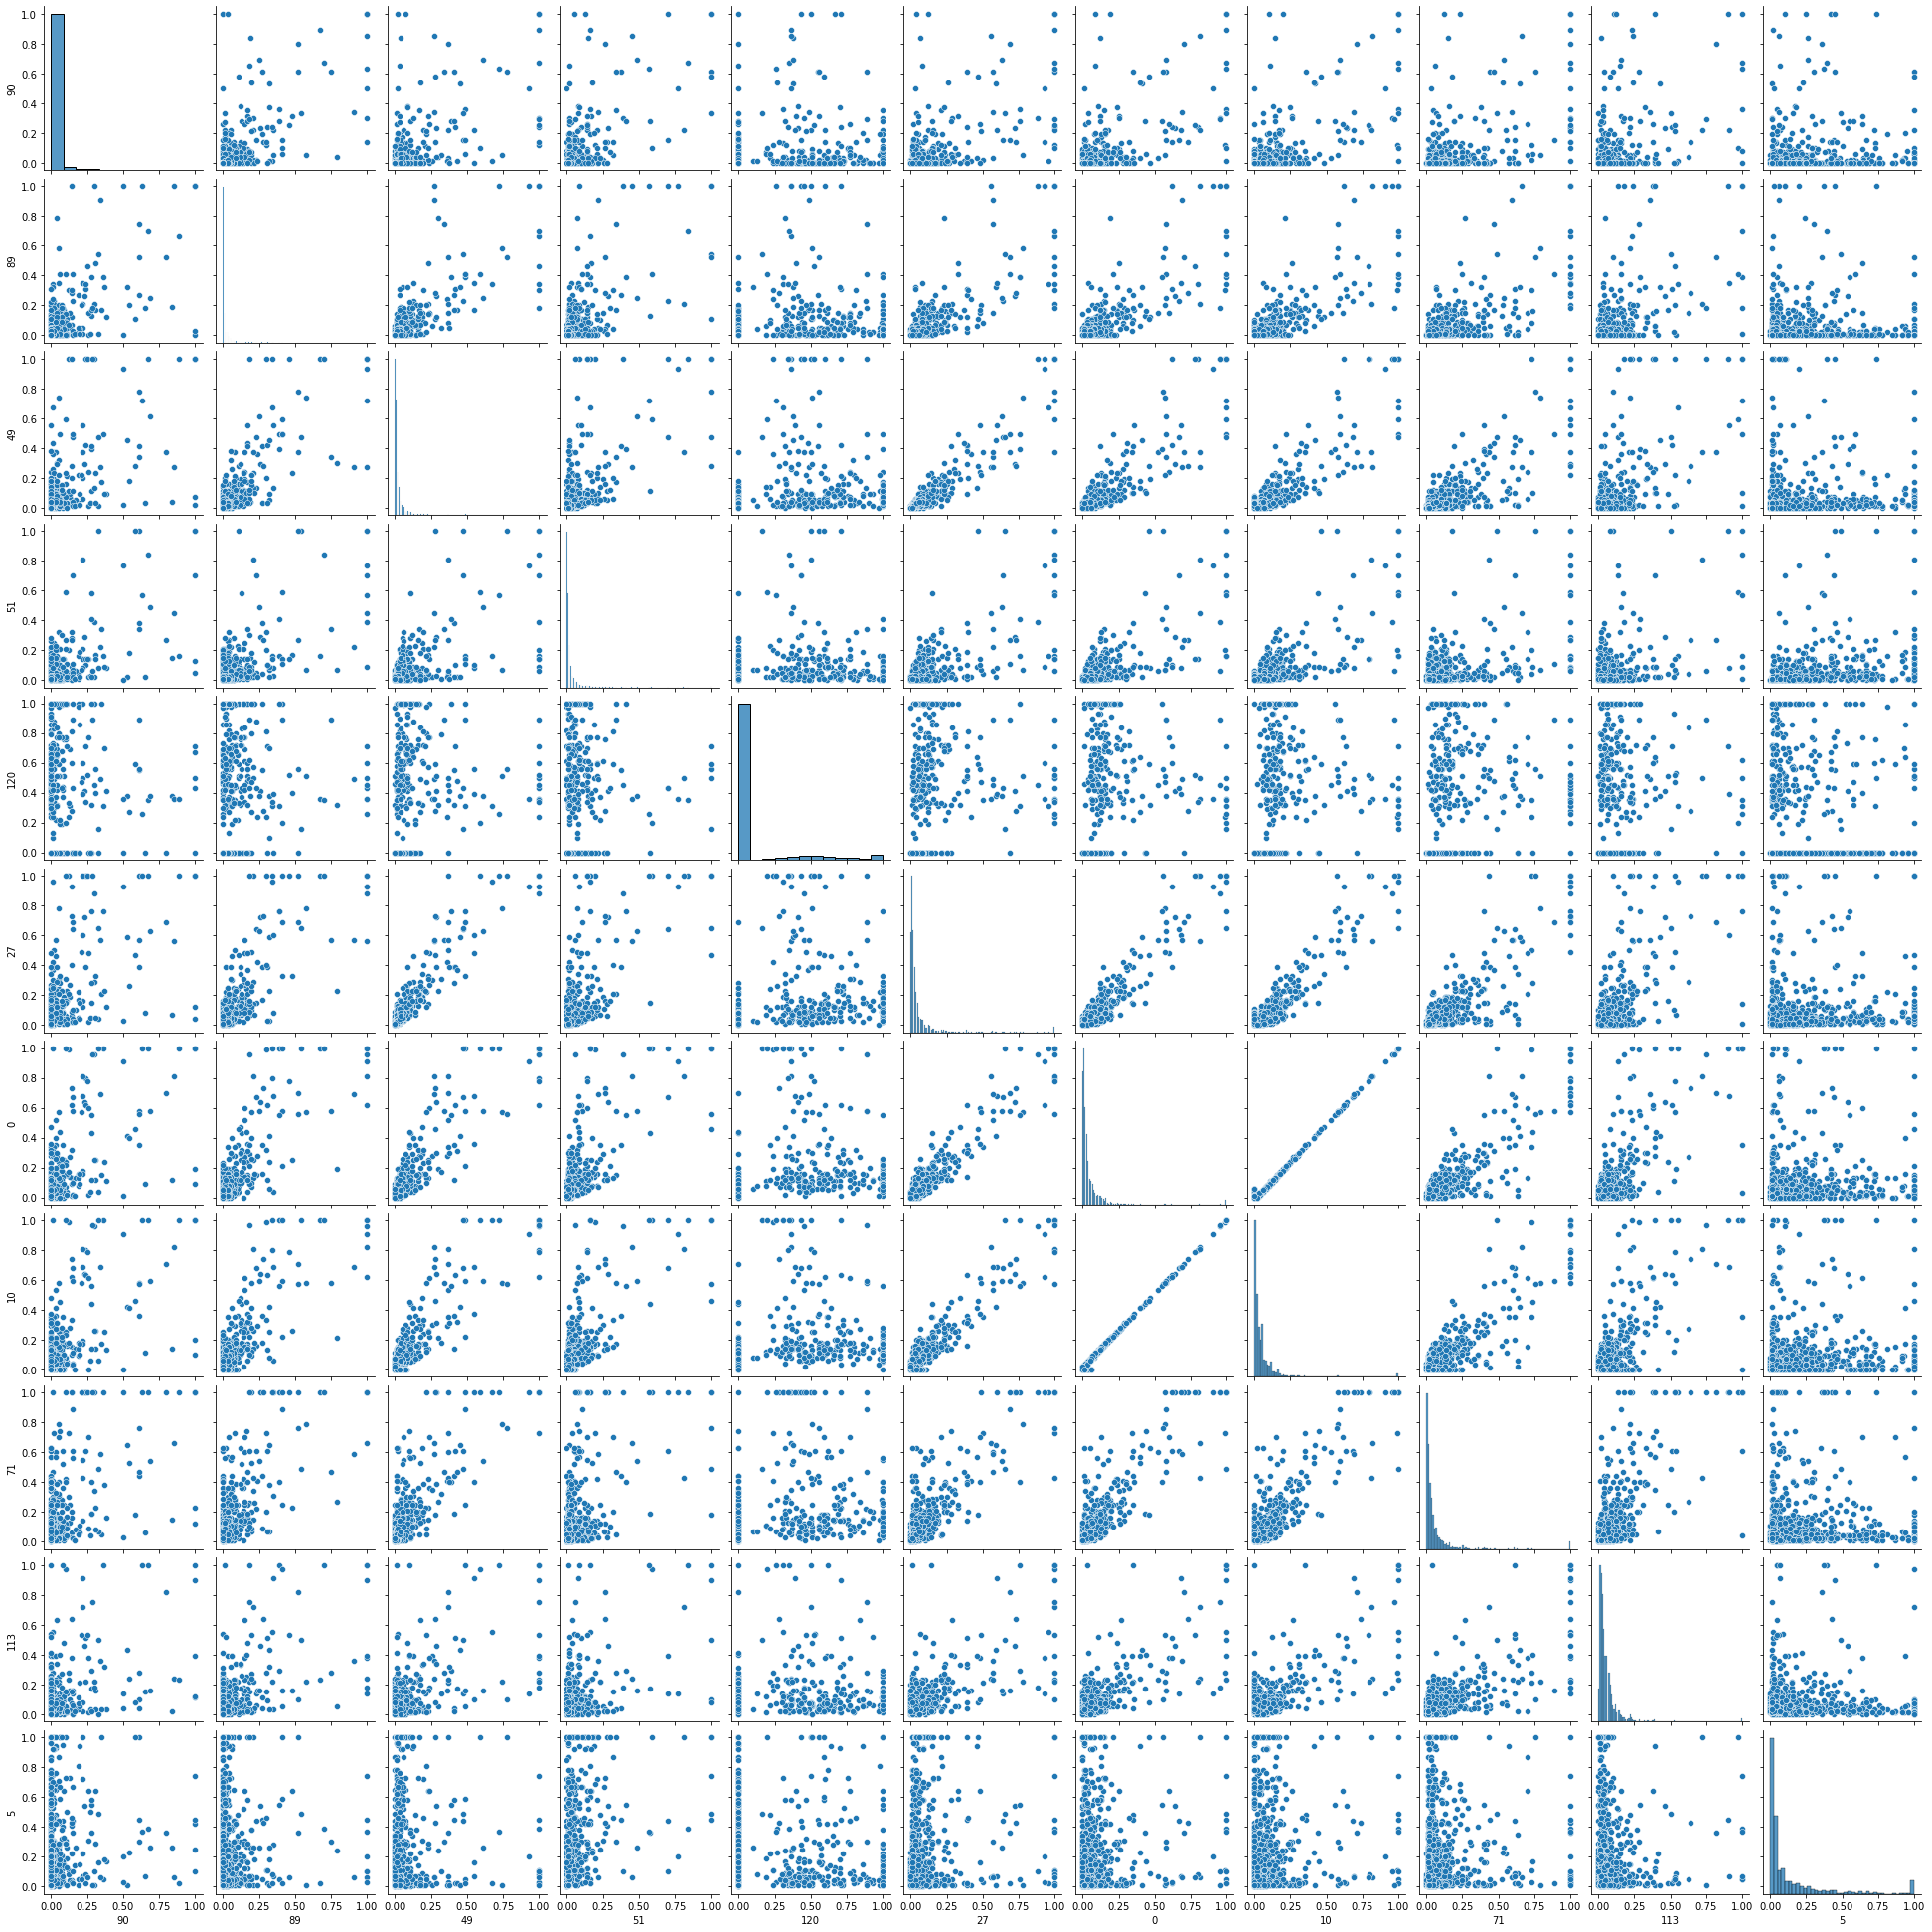

In [63]:
pairplot_fig=sns.pairplot(df_sel,vars=sel)

{'whiskers': [<matplotlib.lines.Line2D at 0x22f0639d970>,
 'caps': [<matplotlib.lines.Line2D at 0x22f063ad280>,
 'boxes': [<matplotlib.lines.Line2D at 0x22f0637dc10>,
 'medians': [<matplotlib.lines.Line2D at 0x22f060b7910>,
 'fliers': [<matplotlib.lines.Line2D at 0x22f063bda60>,
 'means': []}

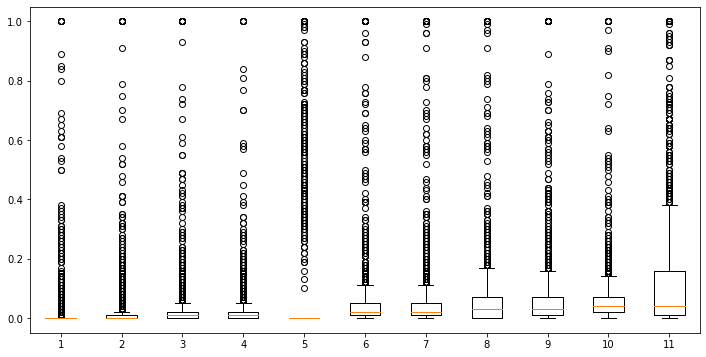

In [64]:
sns.boxplot

### From the scatterplot we can see that some of the features (ex. [0,10] [0,27]  [10,27] ) are highly correlated 

### f

In [65]:
model=LinearRegression()
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [66]:
df_test=df_test.iloc[:,5:]
df_test=imp.fit_transform(df_test)
df_test=pd.DataFrame(df_test)
df_test

0     1     2     3     4     5     6     7     8     9    ...   113  \
0    0.00  0.20  0.03  0.91  0.23  0.05  0.15  0.19  0.09  0.42  ...  0.01   
1    0.00  0.55  0.13  0.78  0.15  0.36  0.48  0.53  0.30  0.10  ...  0.01   
2    0.00  0.52  0.04  0.59  0.05  0.62  0.84  0.78  0.75  0.43  ...  0.01   
3    0.04  0.51  0.07  0.92  0.09  0.03  0.38  0.47  0.27  0.35  ...  0.06   
4    0.03  0.59  0.20  0.75  0.19  0.10  0.38  0.62  0.35  0.11  ...  0.03   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
494  0.01  0.40  0.10  0.87  0.12  0.16  0.43  0.51  0.35  0.30  ...  0.01   
495  0.05  0.96  0.46  0.28  0.83  0.32  0.69  0.86  0.73  0.14  ...  0.02   
496  0.16  0.37  0.25  0.69  0.04  0.25  0.35  0.50  0.31  0.54  ...  0.08   
497  0.08  0.51  0.06  0.87  0.22  0.10  0.58  0.74  0.63  0.41  ...  0.03   
498  0.20  0.78  0.14  0.46  0.24  0.77  0.50  0.62  0.40  0.17  ...  0.11   

      114   115     116       117       118      119   120    121   122  
0    0.23  0.73  0.1605  0.065375  0.655375  0.40625  0.00  0.208  0.12  
1    0.18  0.02  0.1605  0.065375  0.655375  0.40625  0.00  0.208  0.11  
2    0.18  0.00  0.1605  0.065375  0.655375  0.40625  0.00  0.208  0.12  
3    0.13  0.16  0.1605  0.065375  0.655375  0.40625  0.00  0.208  0.06  
4    0.23  0.06  0.1605  0.065375  0.655375  0.40625  0.00  0.208  0.12  
..    ...   ...     ...       ...       ...      ...   ...    ...   ...  
494  0.28  0.05  0.1605  0.065375  0.655375  0.40625  0.00  0.208  0.09  
495  0.37  0.20  0.1605  0.065375  0.655375  0.40625  0.00  0.208  0.45  
496  0.32  0.18  0.0800  0.060000  0.780000  0.00000  0.91  0.280  0.23  
497  0.38  0.33  0.0200  0.020000  0.790000  0.00000  0.22  0.180  0.19  
498  0.30  0.05  0.0800  0.040000  0.730000  0.50000  1.00  0.130  0.48  

[499 rows x 123 columns]

In [67]:
X_train=df_train.drop([122],axis=1)
X_test=df_test.drop([122],axis=1)
y_train=df_train[122]
y_test=df_test[122]

In [68]:
reg=model.fit(X_train,y_train)

In [69]:
reg.score(X_train,y_train)

0.7109206015539502

In [70]:
reg.intercept_

0.5116047894021739

In [71]:
df_coef=pd.DataFrame(reg.coef_)
df_coef.tail(20)

0
102  2.075944e-01
103  6.976005e+12
104 -3.144572e-02
105 -5.025504e-02
106 -1.346017e-01
107 -3.308901e-02
108  2.944241e-02
109  5.689746e-02
110 -2.731493e-01
111 -4.941843e-02
112 -4.367063e-02
113  1.157896e-01
114  3.294803e-02
115 -6.983822e-02
116  9.957968e-02
117  6.381337e-01
118 -9.737743e-05
119  4.715907e-02
120  8.797909e-03
121 -2.067005e-01

In [72]:
y_pred = model.predict(X_test)
MSE = mean_squared_error(y_test,y_pred)
print(f'The mean squared error is: {MSE}')

The mean squared error is: 1.0390913093605722e+19


### The result shows an extremely large MSE. This may be due to an extremely high coefficient in row 103 shown above.

### g

In [73]:
lambdas = 10**np.linspace(10,-2,50)
lambdas

array([1.00000000e+10, 5.68986603e+09, 3.23745754e+09, 1.84206997e+09,
       1.04811313e+09, 5.96362332e+08, 3.39322177e+08, 1.93069773e+08,
       1.09854114e+08, 6.25055193e+07, 3.55648031e+07, 2.02358965e+07,
       1.15139540e+07, 6.55128557e+06, 3.72759372e+06, 2.12095089e+06,
       1.20679264e+06, 6.86648845e+05, 3.90693994e+05, 2.22299648e+05,
       1.26485522e+05, 7.19685673e+04, 4.09491506e+04, 2.32995181e+04,
       1.32571137e+04, 7.54312006e+03, 4.29193426e+03, 2.44205309e+03,
       1.38949549e+03, 7.90604321e+02, 4.49843267e+02, 2.55954792e+02,
       1.45634848e+02, 8.28642773e+01, 4.71486636e+01, 2.68269580e+01,
       1.52641797e+01, 8.68511374e+00, 4.94171336e+00, 2.81176870e+00,
       1.59985872e+00, 9.10298178e-01, 5.17947468e-01, 2.94705170e-01,
       1.67683294e-01, 9.54095476e-02, 5.42867544e-02, 3.08884360e-02,
       1.75751062e-02, 1.00000000e-02])

In [74]:
ridge = Ridge()
coefs = []

In [75]:
for a in lambdas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    
coefs=pd.DataFrame(coefs)
coefs

0             1             2             3             4    \
0   1.686217e-09 -1.817677e-10  5.877744e-09 -6.096837e-09  2.574722e-10   
1   2.963543e-09 -3.194586e-10  1.033020e-08 -1.071525e-08  4.525102e-10   
2   5.208458e-09 -5.614520e-10  1.815543e-08 -1.883217e-08  7.952916e-10   
3   9.153919e-09 -9.867582e-10  3.190835e-08 -3.309773e-08  1.397734e-09   
4   1.608810e-08 -1.734239e-09  5.607924e-08 -5.816959e-08  2.456533e-09   
5   2.827499e-08 -3.047945e-09  9.855979e-08 -1.022336e-07  4.317387e-09   
6   4.969353e-08 -5.356804e-09  1.732197e-07 -1.796764e-07  7.587864e-09   
7   8.733672e-08 -9.414661e-09  3.044347e-07 -3.157823e-07  1.333579e-08   
8   1.534946e-07 -1.654644e-08  5.350452e-07 -5.549883e-07  2.343790e-08   
9   2.697665e-07 -2.908075e-08  9.403411e-07 -9.753902e-07  4.119269e-08   
10  4.741118e-07 -5.111039e-08  1.652640e-06 -1.714235e-06  7.239761e-08   
11  8.332387e-07 -8.982909e-08  2.904470e-06 -3.012714e-06  1.272428e-07   
12  1.464371e-06 -1.578819e-07  5.104447e-06 -5.294651e-06  2.236403e-07   
13  2.573477e-06 -2.774985e-07  8.970534e-06 -9.304712e-06  3.930806e-07   
14  4.522389e-06 -4.877667e-07  1.576400e-05 -1.635099e-05  6.909371e-07   
15  7.946525e-06 -8.574405e-07  2.769980e-05 -2.873042e-05  1.214618e-06   
16  1.396110e-05 -1.507533e-06  4.866542e-05 -5.047359e-05  2.135595e-06   
17  2.452135e-05 -2.651268e-06  8.547675e-05 -8.864489e-05  3.756067e-06   
18  4.304896e-05 -4.665061e-06  1.500622e-04 -1.556003e-04  6.609705e-06   
19  7.551262e-05 -8.215562e-06  2.632313e-04 -2.728722e-04  1.164210e-05   
20  1.322650e-04 -1.448989e-05  4.610848e-04 -4.777457e-04  2.053769e-05   
21  2.310855e-04 -2.562062e-05  8.056459e-04 -8.340640e-04  3.632049e-05   
22  4.019817e-04 -4.549034e-05  1.401695e-03 -1.449030e-03  6.447132e-05   
23  6.940899e-04 -8.129560e-05  2.421222e-03 -2.496650e-03  1.149881e-04   
24  1.183742e-03 -1.466226e-04  4.133180e-03 -4.243282e-03  2.059136e-04   
25  1.979124e-03 -2.672478e-04  6.926175e-03 -7.057645e-03  3.679037e-04   
26  3.210296e-03 -4.902164e-04  1.129649e-02 -1.136886e-02  6.444710e-04   
27  4.988575e-03 -8.902744e-04  1.777199e-02 -1.753959e-02  1.071216e-03   
28  7.329930e-03 -1.549337e-03  2.677985e-02 -2.569341e-02  1.615475e-03   
29  1.006872e-02 -2.475948e-03  3.850133e-02 -3.562232e-02  2.104794e-03   
30  1.281837e-02 -3.505985e-03  5.272189e-02 -4.681047e-02  2.226141e-03   
31  1.504147e-02 -4.337436e-03  6.872799e-02 -5.844393e-02  1.591685e-03   
32  1.623715e-02 -4.718750e-03  8.547931e-02 -6.942061e-02 -2.375202e-04   
33  1.611705e-02 -4.550559e-03  1.021356e-01 -7.855601e-02 -3.727444e-03   
34  1.461727e-02 -3.794431e-03  1.185315e-01 -8.490807e-02 -9.142918e-03   
35  1.179067e-02 -2.367569e-03  1.351508e-01 -8.789468e-02 -1.614404e-02   
36  7.717981e-03 -2.016034e-04  1.526757e-01 -8.710567e-02 -2.362064e-02   
37  2.488975e-03  2.522750e-03  1.715413e-01 -8.207996e-02 -3.007706e-02   
38 -3.710111e-03  5.189188e-03  1.917158e-01 -7.245866e-02 -3.435335e-02   
39 -1.043255e-02  6.903245e-03  2.125538e-01 -5.861919e-02 -3.617831e-02   
40 -1.703797e-02  6.907842e-03  2.326989e-01 -4.223421e-02 -3.612604e-02   
41 -2.318437e-02  4.844920e-03  2.504185e-01 -2.595875e-02 -3.502128e-02   
42 -2.910581e-02  8.302507e-04  2.643795e-01 -1.225970e-02 -3.342827e-02   
43 -3.497929e-02 -4.422328e-03  2.741790e-01 -2.374220e-03 -3.164530e-02   
44 -4.006285e-02 -9.693758e-03  2.802709e-01  3.831392e-03 -2.992603e-02   
45 -4.285013e-02 -1.381676e-02  2.835647e-01  7.280129e-03 -2.853697e-02   
46 -4.227061e-02 -1.625685e-02  2.850306e-01  9.010697e-03 -2.764606e-02   
47 -3.871793e-02 -1.721051e-02  2.854688e-01  9.812584e-03 -2.724137e-02   
48 -3.380988e-02 -1.725213e-02  2.854391e-01  1.017021e-02 -2.717618e-02   
49 -2.919136e-02 -1.692335e-02  2.852699e-01  1.033858e-02 -2.727756e-02   

             5             6             7             8             9    ...  \
0   2.397488e-09  3.276588e-10  7.194099e-10  5.203162e

In [76]:
ridgecv = RidgeCV(alphas = lambdas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

2.8117686979742365

In [77]:
ridge_sel = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge_sel.fit(X_train, y_train)
MSE_ridge=mean_squared_error(y_test, ridge_sel.predict(X_test))

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [78]:
print(f'MSE for ridge regression model is {MSE_ridge}')

MSE for ridge regression model is 0.018551986823939354


### h

In [79]:
lasso = Lasso(max_iter = 10000)
coefs = []

In [80]:
for a in lambdas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
coefs=pd.DataFrame(coefs)
coefs

0    1    2         3    4    5    6    7    8    9    ...  112  113  114  \
0   0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1   0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2   0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3   0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4   0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5   0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
6   0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
7   0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
8   0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
9   0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
10  0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
11  0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
12  0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
13  0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
14  0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
15  0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
16  0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
17  0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
18  0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
19  0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
20  0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
21  0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
22  0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
23  0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
24  0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
25  0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
26  0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
27  0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
28  0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
29  0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
30  0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
31  0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
32  0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
33  0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
34  0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
35  0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
36  0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
37  0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
38  0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
39  0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
40  0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
41  0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
42  0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
43  0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
44  0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
45  0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
46  0.0 -0.0  0.0 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
47  0.0 -0.0  0.0 -0.067246  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
48  0.0 -0.0  0.0 -0.146281  0.0  0

In [81]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
MSE_lasso=mean_squared_error(y_test, lasso.predict(X_test))

In [82]:
print(f'MSE for Lasso regression model is {MSE_lasso}')

MSE for Lasso regression model is 0.01774934769131434


In [83]:
scaler = StandardScaler()

In [84]:
scaler.fit(X_train)
scaler.fit(X_test)

StandardScaler()

In [85]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
lasso = Lasso(max_iter = 10000)
coefs = []

In [87]:
for a in lambdas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_scaled, y_train)
    coefs.append(lasso.coef_)
coefs=pd.DataFrame(coefs)
coefs

0    1         2         3    4    5    6    7    8    9    ...  112  113  \
0   0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1   0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2   0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3   0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4   0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
5   0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
6   0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
7   0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
8   0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
9   0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
10  0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
11  0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
12  0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
13  0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
14  0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
15  0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
16  0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
17  0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
18  0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
19  0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
20  0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
21  0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
22  0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
23  0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
24  0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
25  0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
26  0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
27  0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
28  0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
29  0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
30  0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
31  0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
32  0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
33  0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
34  0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
35  0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
36  0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
37  0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
38  0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
39  0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
40  0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
41  0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
42  0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
43  0.0 -0.0  0.000000 -0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
44  0.0 -0.0  0.000000 -0.000992  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
45  0.0 -0.0  0.000000 -0.027347  0.0  0.0 -0.0  0.0  0.0  0.0  ...  0.0  0.0   
46  0.0 -0.0  0.000000 -0.040585  0.0  0.0 -0.0 -0.0 -0.0  0.0  ... -0.0  0.0   
47  0.0 -0.0  0.000000 -0.048112  0.0  0.0 -0.0 -0.0 -0.0  0.0  ... -0.0  0.0   
48  0.0 -0.0  0.007525 -0.040641  0

In [88]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000)
lassocv.fit(X_train_scaled, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train_scaled, y_train)
MSE_lasso_scaled=mean_squared_error(y_test, lasso.predict(X_test_scaled))

In [89]:
print(f'MSE for Lasso regression model after standardization is {MSE_lasso_scaled}')

MSE for Lasso regression model after standardization is 0.017837777261490825


### The MSE slightly increased after standardization

### i

In [90]:
pca=PCA()

In [91]:
X_train_reduced = pca.fit_transform(X_train)

In [92]:
X_train=pd.DataFrame(X_train_reduced)
X_train

0         1         2         3         4         5         6    \
0     0.376849 -0.298645 -0.540593  0.072254  0.319830 -0.593356  0.206831   
1    -0.140893  0.250035 -0.955791  0.194238 -0.018125 -0.831043  0.188811   
2    -0.593570 -0.520188  0.074218 -0.042706 -0.047083  0.081363  0.690138   
3     0.589997  0.299584  0.415041 -0.365960  1.146888  0.481200  0.486801   
4     1.031427 -0.696977  0.574107 -0.089189  0.318523 -0.191188 -0.040844   
...        ...       ...       ...       ...       ...       ...       ...   
1490  2.706070  0.883930  0.477434 -0.374561 -0.358821  1.026514  0.252268   
1491  0.797545  1.812125  0.080707  0.222538 -0.045119 -0.276351  0.005392   
1492 -2.009517 -0.632364  0.026320 -0.390202 -0.225748  0.709725  0.647402   
1493  0.957097 -0.696471  0.474079 -0.188164  0.512840 -0.297195 -0.102844   
1494 -1.067084  2.448934  0.368047 -0.730042 -0.869501 -0.604483 -0.445524   

           7         8         9    ...       112       113       114  \
0     0.065943  0.115624  0.072084  ... -0.001008  0.002750 -0.000014   
1    -0.563345  0.081131 -0.081195  ...  0.004642  0.003547  0.003411   
2    -0.328272  0.057923  0.412185  ... -0.004216  0.004778  0.003646   
3    -0.372590 -0.461661  0.324746  ...  0.013705  0.019884  0.005346   
4     0.034747  0.006843 -0.057859  ... -0.010633  0.000453 -0.004030   
...        ...       ...       ...  ...       ...       ...       ...   
1490  0.370033 -0.232538 -0.792865  ... -0.013585 -0.012872  0.005777   
1491 -0.270911  0.127908 -0.302148  ...  0.002366 -0.008615  0.008246   
1492 -0.208946 -0.340848 -0.178440  ...  0.003965 -0.016232  0.002468   
1493 -0.069723  0.043456  0.004224  ...  0.002141  0.003786 -0.001041   
1494 -0.346474  0.237878  0.328698  ...  0.007994  0.004492 -0.000044   

           115       116       117       118       119       120           121  
0     0.015640 -0.007507  0.003223 -0.000729 -0.000200  0.003546 -3.866291e-16  
1    -0.001269 -0.002577 -0.013173 -0.004361  0.012941  0.000213  4.123743e-17  
2    -0.001240 -0.000994 -0.010142  0.005127  0.001120 -0.000160 -1.978012e-16  
3     0.004134  0.002880  0.003234  0.011983 -0.001430 -0.000472  1.218959e-16  
4    -0.002646 -0.001509 -0.003910 -0.008616  0.001255 -0.000480 -1.141266e-16  
...        ...       ...       ...       ...       ...       ...           ...  
1490  0.001673  0.003366  0.001689 -0.000983 -0.004228  0.001550 -4.112664e-18  
1491  0.008647 -0.015386  0.000167  0.003905 -0.002673 -0.000872 -1.520637e-17  
1492  0.000092 -0.000577  0.003531  0.003661  0.000627  0.000505  1.808123e-18  
1493 -0.000002 -0.000925 -0.000935 -0.006227  0.000149  0.000647  2.156342e-17  
1494 -0.003131  0.018698  0.013153  0.007740  0.003221 -0.001381 -4.241670e-17  

[1495 rows x 122 columns]

In [93]:
kf_20 = model_selection.KFold( n_splits=20, shuffle=True, random_state=100)

In [94]:
mse = []
model=LinearRegression()

#score = -1*model_selection.cross_val_score(model, np.ones((n,1)), y_train.ravel(), cv=kf_20, scoring='neg_mean_squared_error').mean()    
#mse.append(score)


for m in np.arange(1, 122):
    score = -1*model_selection.cross_val_score(model, X_train.iloc[:,:m], y_train.ravel(), cv=kf_20, scoring='neg_mean_squared_error').mean()
    mse.append([m,score])

In [95]:
mse=pd.DataFrame(mse)
mse.columns=['M','MSE']
mse

M       MSE
0      1  0.037990
1      2  0.030674
2      3  0.027646
3      4  0.024289
4      5  0.023064
..   ...       ...
116  117  0.019825
117  118  0.019844
118  119  0.019865
119  120  0.019867
120  121  0.019979

[121 rows x 2 columns]

In [96]:
mse[mse['MSE']==mse['MSE'].min()]

M       MSE
95  96  0.019209

In [97]:
X_test_reduced=pca.transform(X_test)
X_test=pd.DataFrame(X_test_reduced)

model = LinearRegression()
model.fit(X_train.iloc[:,:97], y_train)


pred = model.predict(X_test.iloc[:,:97])
mse_pcr=mean_squared_error(y_test, pred)


In [98]:
print(f' The test error for PCR model is {mse_pcr}')

 The test error for PCR model is 0.018425005665007738


### j

In [99]:
alpha=10**np.linspace(10,-4,150)
alpha

array([1.00000000e+10, 8.05453121e+09, 6.48754729e+09, 5.22541521e+09,
       4.20882699e+09, 3.39001283e+09, 2.73049642e+09, 2.19928686e+09,
       1.77142246e+09, 1.42679775e+09, 1.14921870e+09, 9.25641789e+08,
       7.45561067e+08, 6.00514488e+08, 4.83686269e+08, 3.89586614e+08,
       3.13793754e+08, 2.52746159e+08, 2.03575182e+08, 1.63970266e+08,
       1.32070362e+08, 1.06376485e+08, 8.56812721e+07, 6.90122480e+07,
       5.55861305e+07, 4.47720223e+07, 3.60617651e+07, 2.90460612e+07,
       2.33952406e+07, 1.88437696e+07, 1.51777730e+07, 1.22249846e+07,
       9.84665203e+06, 7.93101660e+06, 6.38806207e+06, 5.14528453e+06,
       4.14428548e+06, 3.33802767e+06, 2.68862481e+06, 2.16556124e+06,
       1.74425806e+06, 1.40491810e+06, 1.13159567e+06, 9.11447260e+05,
       7.34128040e+05, 5.91305720e+05, 4.76269038e+05, 3.83612383e+05,
       3.08981791e+05, 2.48870348e+05, 2.00453398e+05, 1.61455815e+05,
       1.30045090e+05, 1.04745224e+05, 8.43673672e+04, 6.79539592e+04,
      

In [100]:
data_dmatrix_train = xgb.DMatrix(data=X_train,label=y_train)
data_dmatrix_test=xgb.DMatrix(data=X_test,label=y_test)

In [101]:
result=[]

for i in alpha:
    xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = i, n_estimators = 10)
    
#    cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
#                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
    
    xg_reg.fit(X_train,y_train)

    y_pred = xg_reg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    result.append([i,rmse])

[21:56:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[21:56:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[21:56:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[21:56:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[21:56:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[21:56:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:18

[21:56:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[21:56:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[21:56:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[21:56:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[21:56:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[21:56:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:18

[21:56:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[21:56:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[21:56:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[21:56:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[21:56:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[21:56:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:18

In [102]:
result=pd.DataFrame(result)
result.columns=['alpha','MSE']

In [103]:
result

alpha       MSE
0    1.000000e+10  0.346989
1    8.054531e+09  0.346989
2    6.487547e+09  0.346989
3    5.225415e+09  0.346989
4    4.208827e+09  0.346989
..            ...       ...
145  2.375959e-04  0.208821
146  1.913724e-04  0.208818
147  1.541415e-04  0.208616
148  1.241537e-04  0.208613
149  1.000000e-04  0.208613

[150 rows x 2 columns]

In [104]:
result[result.MSE==min(result.MSE)]

alpha       MSE
109  0.57331  0.203396

### The alpha that gives the lowest MSE is 0.57331

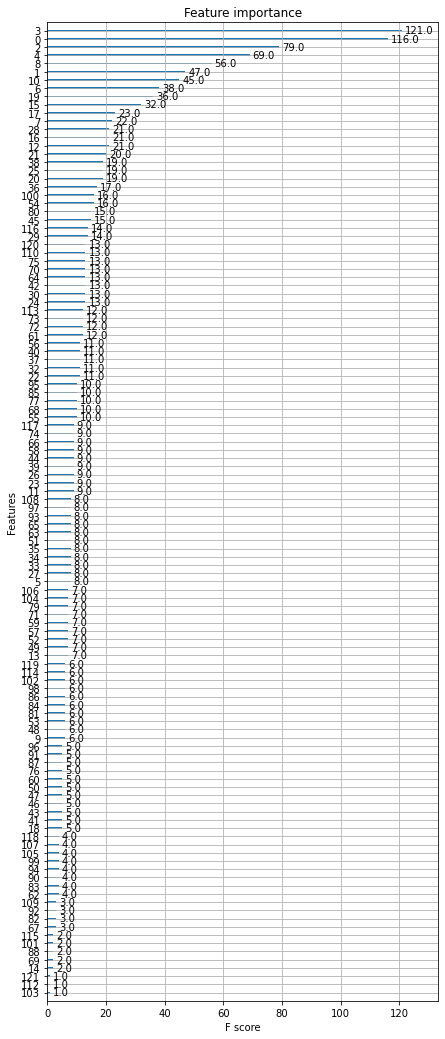

In [120]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [6,18]
plt.show()